In [2]:
library(Seurat)
library(ggplot2)
library(patchwork)
library(scattermore)
library(dplyr)
library(ComplexHeatmap)
library(grid)
library(circlize)

Attaching SeuratObject

Seurat v4 was just loaded with SeuratObject v5; disabling v5 assays and
validation routines, and ensuring assays work in strict v3/v4
compatibility mode


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: grid

ComplexHeatmap version 2.22.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort.

In [107]:
source('R_function/Pr_Al.R')
source('R_function/segment_plot.R')
source('R_function/calculate_function.R')

In [51]:
#The processed segment × celltypes files can be downloaded at https://db.cngb.org/stomics/mbcsta/download/
obj_segment <- readRDS('data/Segment_celltypes_marmoset.rds')

In [ ]:
#The processed segment × genes files can be downloaded at https://db.cngb.org/stomics/mbcsta/download/
obj_segment_gene <- readRDS('data/Segment_genes_marmoset.rds')

In [4]:
#The segment border files can be downloaded at https://db.cngb.org/stomics/mbcsta/download/ or https://github.com/haoshijie13/MCCSTA
Border <- read.csv('data/Border.txt')

In [ ]:
#pre-processed region × gene seurat object, detail see this study Method, download from https://db.cngb.org/stomics/mbcsta/download/
obj_mar_gene <- readRDS('data/region_gene/Region_gene_marmoset.rds')
obj_mac_gene <- readRDS('data/region_gene/Region_gene_macaque.rds')
obj_mou_gene <- readRDS('data/region_gene/Region_gene_mouse.rds')
obj_hum_gene <- readRDS('data/region_gene/Region_gene_human.rds')

In [319]:
#Reading, Normalizing and RunPCA files
source('R_function/Pr_Al.R')
readRDS_processed <- function(obj_path){return(prepare_obj(readRDS(obj_path)))}
#pre-processed region × celltypes seurat object, detail see this study Method, download from https://db.cngb.org/stomics/mbcsta/download/
obj_mar <- readRDS_processed('data/region_cell/Region_celltype_marmoset.rds')
obj_mac <- readRDS_processed('data/region_cell/Region_celltype_macaque.rds')
obj_mou <- readRDS_processed('data/region_cell/Region_celltype_mouse.rds')
obj_hum <- readRDS_processed('data/region_cell/Region_celltype_human.rds')
obj_mar2 <- readRDS_processed('data/region_cell/Region_celltype_marmoset_R2.rds')
obj_mac2 <- readRDS_processed('data/region_cell/Region_celltype_macaque_R2.rds')
obj_mac3 <- readRDS_processed('data/region_cell/Region_celltype_macaque_R3.rds')
#pre-processed region-layer × celltypes seurat object, detail see this study Method, download from https://db.cngb.org/stomics/mbcsta/download/
obj_mar_L1 <- readRDS_processed('data/region_cell/Region_L1_celltype_marmoset.rds')
obj_mar_L2 <- readRDS_processed('data/region_cell/Region_L2_celltype_marmoset.rds')
obj_mar_L3 <- readRDS_processed('data/region_cell/Region_L3_celltype_marmoset.rds')
obj_mar_L4 <- readRDS_processed('data/region_cell/Region_L4_celltype_marmoset.rds')
obj_mar_L5 <- readRDS_processed('data/region_cell/Region_L5_celltype_marmoset.rds')
obj_mar_L6 <- readRDS_processed('data/region_cell/Region_L6_celltype_marmoset.rds')
obj_mac_L1 <- readRDS_processed('data/region_cell/Region_L1_celltype_macaque.rds')
obj_mac_L2 <- readRDS_processed('data/region_cell/Region_L2_celltype_macaque.rds')
obj_mac_L3 <- readRDS_processed('data/region_cell/Region_L3_celltype_macaque.rds')
obj_mac_L4 <- readRDS_processed('data/region_cell/Region_L4_celltype_macaque.rds')
obj_mac_L5 <- readRDS_processed('data/region_cell/Region_L5_celltype_macaque.rds')
obj_mac_L6 <- readRDS_processed('data/region_cell/Region_L6_celltype_macaque.rds')
obj_mou_L1 <- readRDS_processed('data/region_cell/Region_L1_celltype_mouse.rds')
obj_mou_L23 <- readRDS_processed('data/region_cell/Region_L23_celltype_mouse.rds')
obj_mou_L4 <- readRDS_processed('data/region_cell/Region_L4_celltype_mouse.rds.rds')
obj_mou_L5 <- readRDS_processed('data/region_cell/Region_L5_celltype_mouse.rds.rds')
obj_mou_L6 <- readRDS_processed('data/region_cell/Region_L6_celltype_mouse.rds.rds')

Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”


<font size=10>---------------Segment-level cell type analysis-------------<font size=10>

In [52]:
region_list <- list('V1'=c('V1'),'S1'=c('A3a','A3b'),'A1'=c('AuA1'),'V5'=c('V5'),
                    'Pir'=c('Pir','Apri'),'Ent'=c('Ent'))
source('R_function/Pr_Al.R')
#Calculate the correlation between V1/A1/S1/V5 and Pir/Ent using the PrAl_index_cal function from the Pr_Al.R script.
for( i in names(region_list) ){
    obj_segment@meta.data[,paste0(i,'-Cor')] <- region_cor_segment_one(as.matrix(obj_segment[['Neuron_smooth']]@data),
                                                                       as.matrix(obj_mar[['Neuron']]@data),
                                                                       region_list[i][[1]])}

In [137]:
#Calculate the correlation between Pr/Al and Pr-Al Index using PrAl_index_cal function from Pr_Al.R
source('R_function/Pr_Al.R')
PrAl_result <- PrAl_index_cal(as.matrix(obj_segment[['Neuron_smooth']]@data),
                              as.matrix(obj_mar[['Neuron']]@data[,c('V1','AuA1','A3a','A3b')]),
                              as.matrix(obj_mar[['Neuron']]@data[,c('Pir','Ent','Apri')]),normalize=TRUE)
obj_segment$`Pr-Cor` <- PrAl_result$`Cor_Pr`
obj_segment$`Al-Cor` <- PrAl_result$`Cor_Al`
obj_segment$`Pr-Al-Index` <- PrAl_result$`Pr-Al_index`
#Calculate the PCA of cell type compositions
obj_segment@active.assay <- 'Neuron_smooth'
obj_segment[['Neuron_smooth']]@var.features <- rownames(obj_segment[['Neuron_smooth']])
obj_segment <- ScaleData(obj_segment)
obj_segment <- RunPCA(obj_segment,verbose = FALSE)
obj_segment$`Cell-PC1` <- obj_segment[['pca']]@cell.embeddings[,'PC_1']
obj_segment$`Cell-PC2` <- obj_segment[['pca']]@cell.embeddings[,'PC_2']

Centering and scaling data matrix



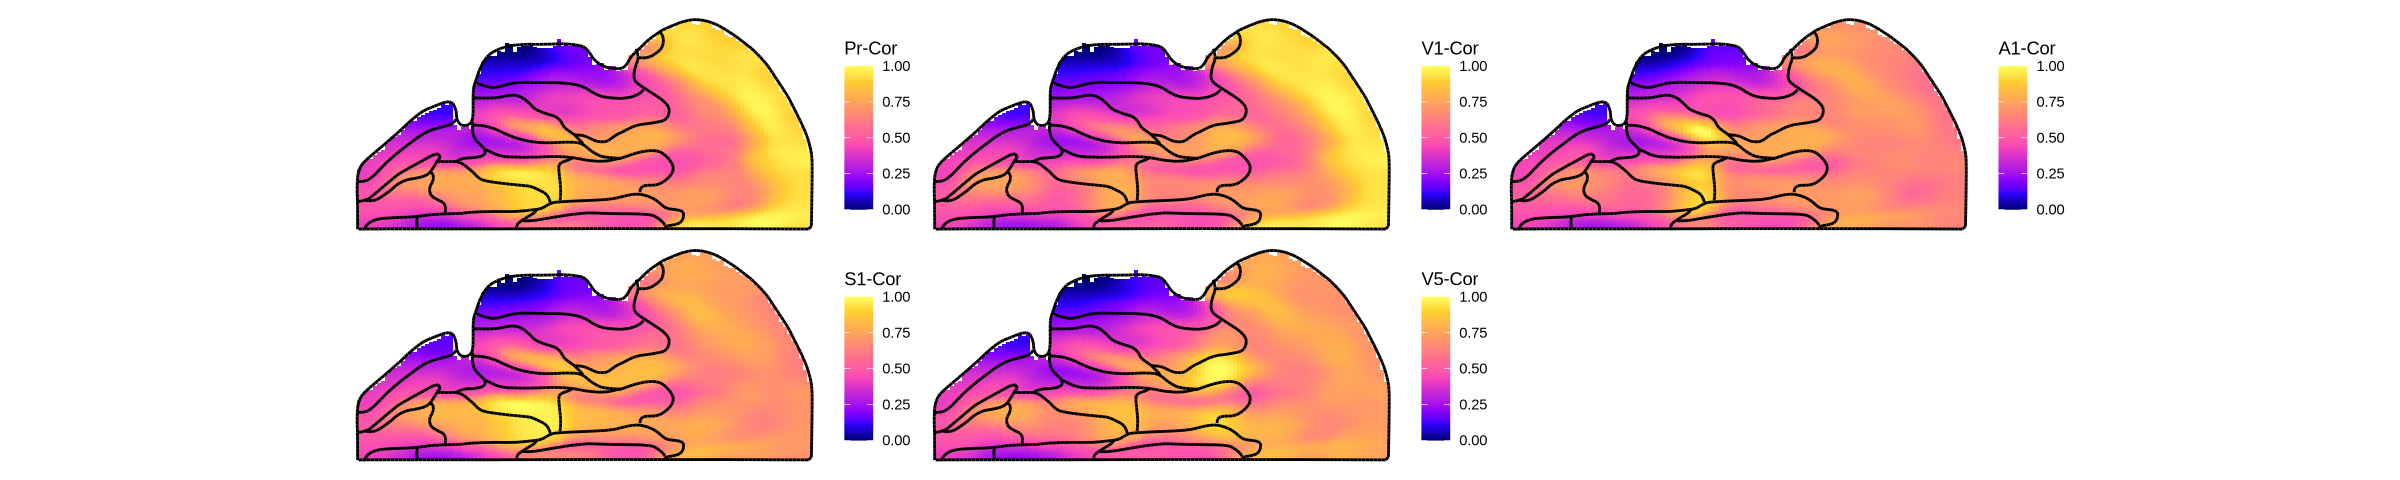

In [67]:
options(repr.plot.width=20,repr.plot.height=4)
#Plot Pr related correlation pattern, using plot_col_exp function from segment_plot.R
source('R_function/segment_plot.R')
gradient_color <- rev(c('#000075','#2E00FF','#9408F7','#C729D6','#FA4AB5','#FF6A95','#FF8B74','#FFAC53','#FFCD32','#FFFF60'))
plot_col_exp(obj_segment@meta.data,col_exp = 'Pr-Cor',color = gradient_color)+
plot_col_exp(obj_segment@meta.data,col_exp = 'V1-Cor',color = gradient_color)+
plot_col_exp(obj_segment@meta.data,col_exp = 'A1-Cor',color = gradient_color)+
plot_col_exp(obj_segment@meta.data,col_exp = 'S1-Cor',color = gradient_color)+
plot_col_exp(obj_segment@meta.data,col_exp = 'V5-Cor',color = gradient_color)

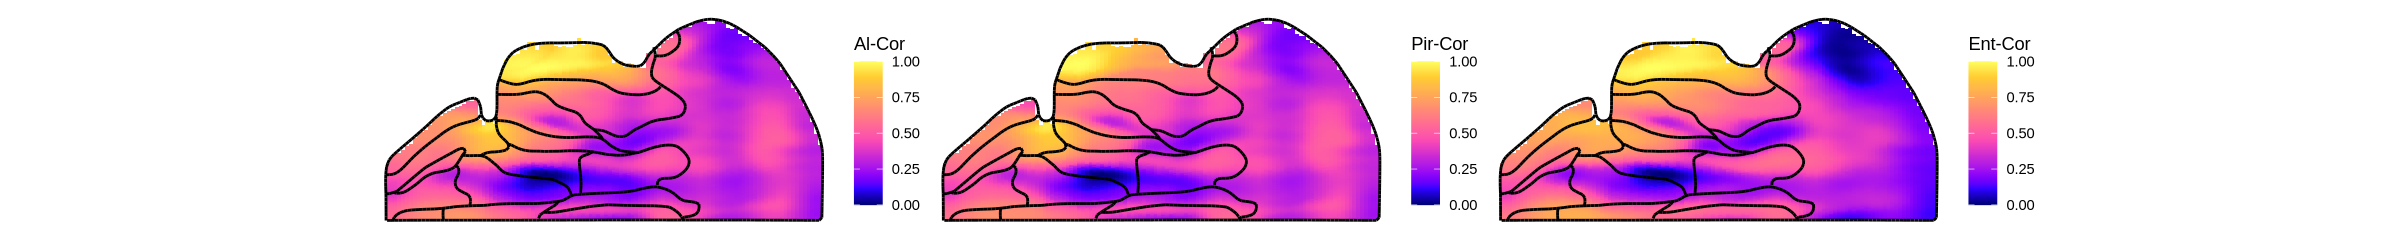

In [71]:
options(repr.plot.width=20,repr.plot.height=2)
#Plot Al related correlation pattern, using plot_col_exp function from segment_plot.R
plot_col_exp(obj_segment@meta.data,col_exp = 'Al-Cor',color = gradient_color)+
plot_col_exp(obj_segment@meta.data,col_exp = 'Pir-Cor',color = gradient_color)+
plot_col_exp(obj_segment@meta.data,col_exp = 'Ent-Cor',color = gradient_color)

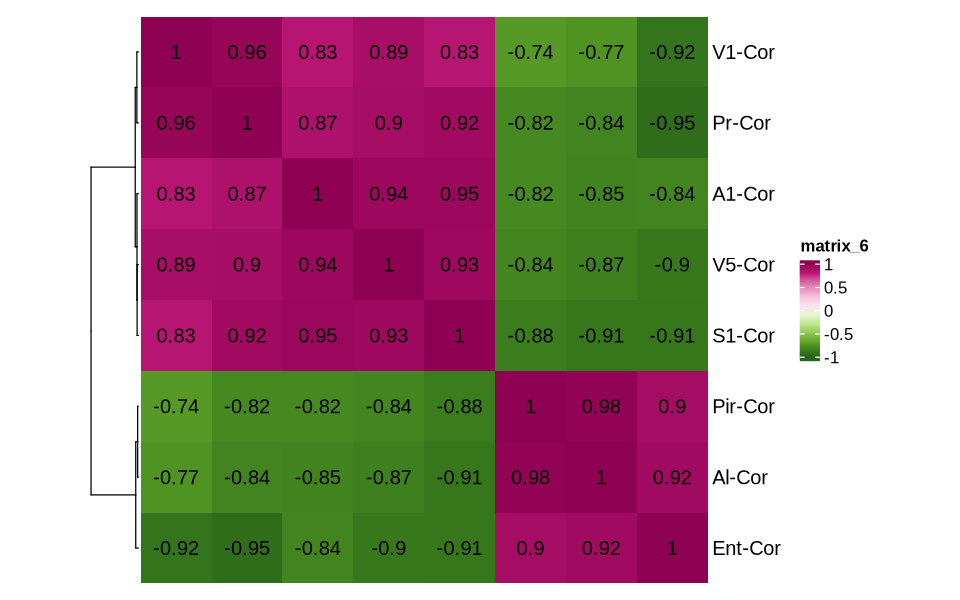

In [78]:
#Correlation between all pattern
col_fun = circlize::colorRamp2(seq(-1,1,length.out = 10), rev(RColorBrewer::brewer.pal(10,'PiYG')))
Cor_matrix <- cor(obj_segment@meta.data[,c('V1-Cor','A1-Cor','S1-Cor','V5-Cor','Pr-Cor','Pir-Cor','Ent-Cor','Al-Cor')])
options(repr.plot.width=8,repr.plot.height=5)
ComplexHeatmap::Heatmap(Cor_matrix,col = col_fun,
                        show_column_dend = FALSE,show_column_names = FALSE,
                        width =ncol(Cor_matrix)*unit(15, "mm"),height=ncol(Cor_matrix)*unit(15, "mm"),
                        cell_fun = function(j, i, x, y, w, h, col) { # add text to each grid
                        grid::grid.text(round(Cor_matrix[i, j],2), x, y)})

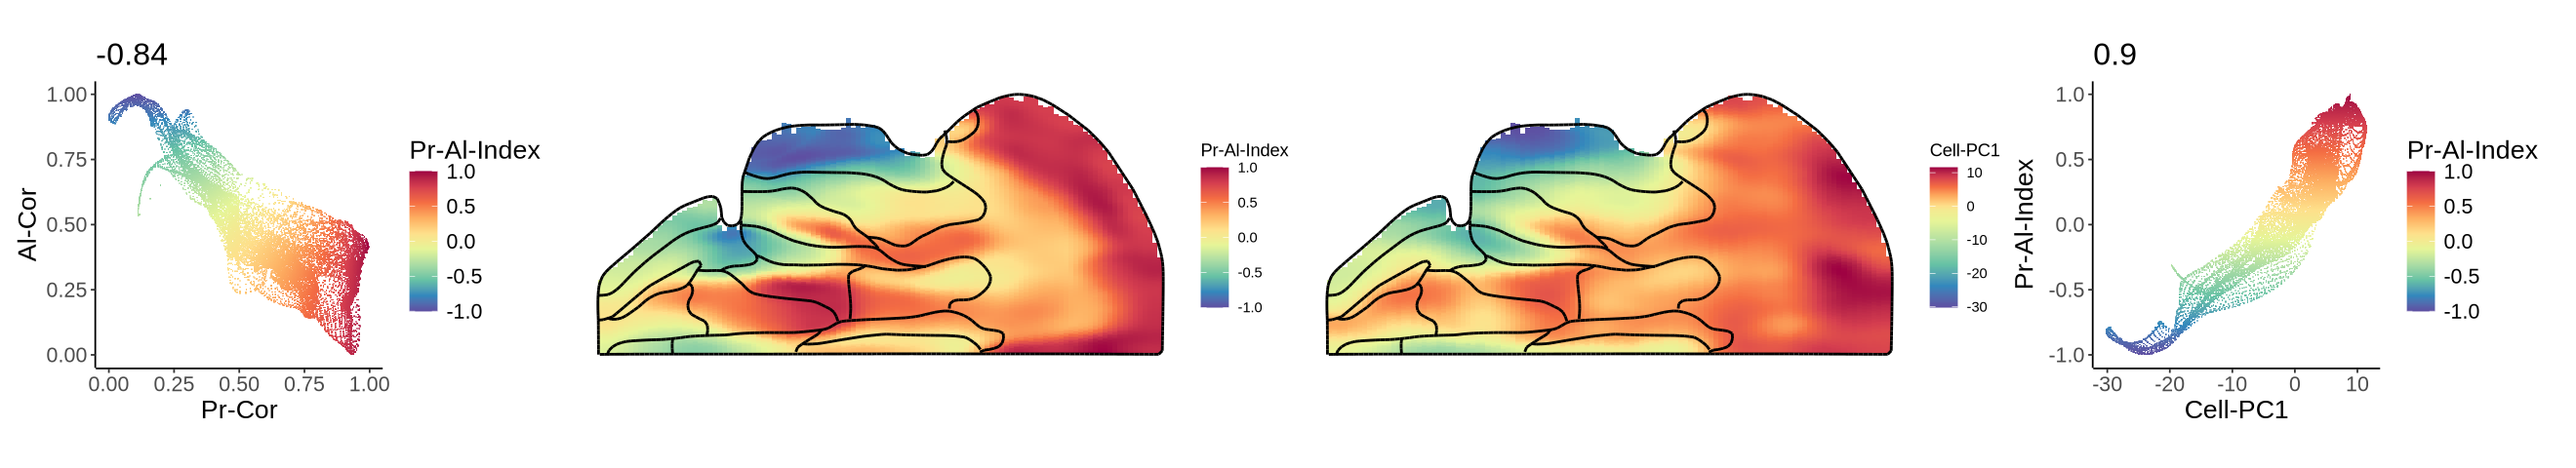

In [138]:
#Plot Pr-Al-Index, Cell-PC1 and the correlation between them
source('R_function/Pr_Al.R')
options(repr.plot.width=22,repr.plot.height=4)
plot_cor_raster(obj_segment,X='Pr-Cor',Y='Al-Cor',var='Pr-Al-Index')+
plot_col_exp(obj_segment@meta.data,col_exp = 'Pr-Al-Index')+
plot_col_exp(obj_segment@meta.data,col_exp = 'Cell-PC1',vmid=0.3)+
plot_cor_raster(obj_segment,X='Cell-PC1',Y='Pr-Al-Index',var='Pr-Al-Index')+
plot_layout(ncol=4)

<font size=10>---------------Segment-level gene analysis-------------<font size=10>

In [239]:
#The processed segment × genes files can be downloaded at https://db.cngb.org/stomics/mbcsta/download/
obj_segment_gene <- readRDS('data/Segment_genes_marmoset.rds')

In [274]:
#Calculate PCA by Seurat RunPCA
obj_segment_gene <- ScaleData(obj_segment_gene)
obj_segment_gene <- RunPCA(obj_segment_gene,verbose=F)

Centering and scaling data matrix

Warning message:
“Number of dimensions changing from 10 to 50”


In [275]:
obj_segment_gene$`Gene-PC1` <- obj_segment_gene[['pca']]@cell.embeddings[,'PC_1']
obj_segment$`Gene-PC1` <- obj_segment_gene$`Gene-PC1`

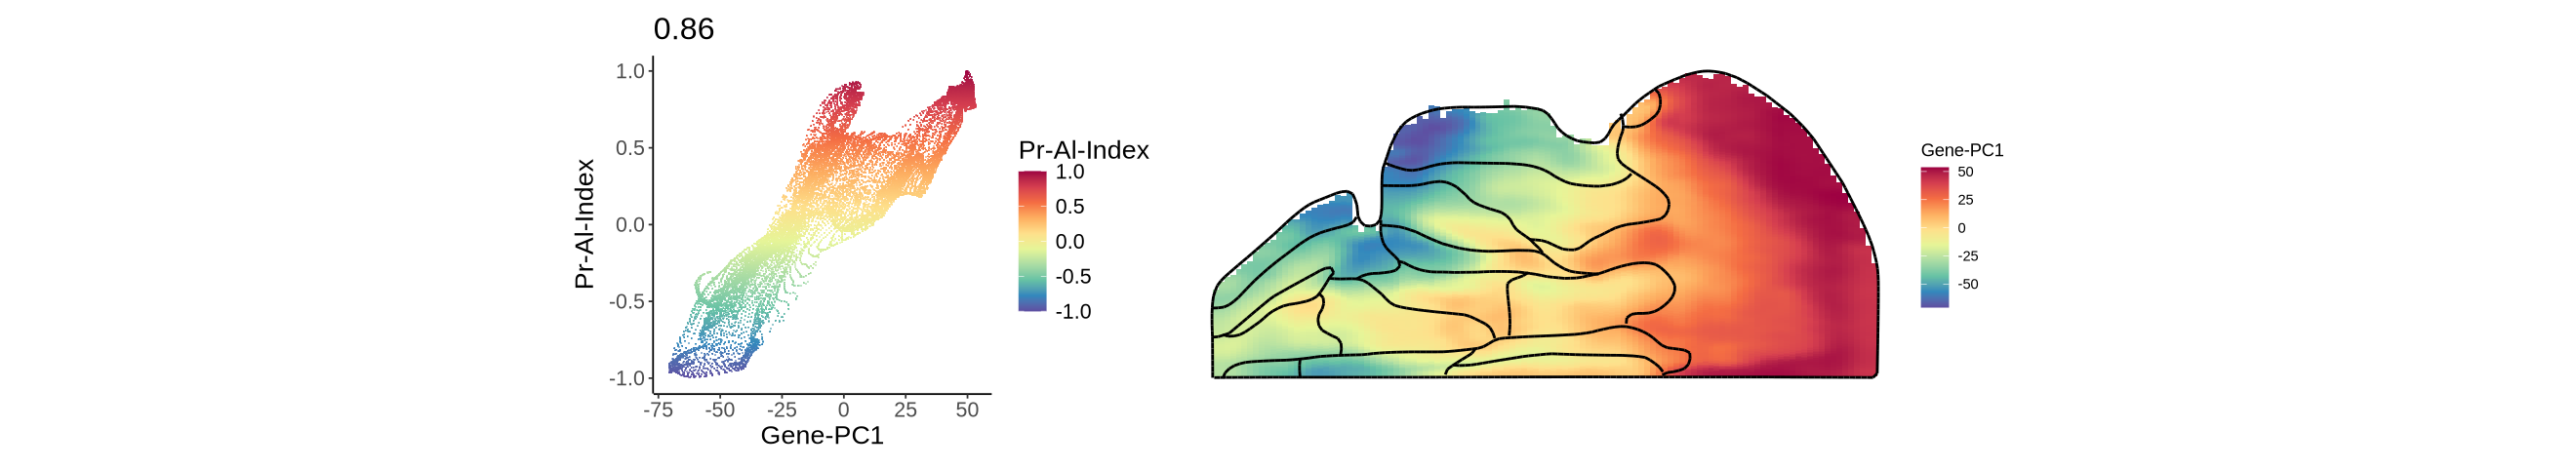

In [276]:
options(repr.plot.width=22,repr.plot.height=4)
#Plot the correlation between Gene-PC1 and Pr-Al Index
plot_cor_raster(obj_segment,X='Gene-PC1',Y='Pr-Al-Index',var='Pr-Al-Index')+
plot_col_exp(obj_segment@meta.data,col_exp = 'Gene-PC1')

<font size=10>---------------Region-level cell type analysis-------------<font size=10>

In [159]:
#Calculate the different species' region-level correlation between Pr/Al and Pr-Al Index using PrAl_index_cal function from Pr_Al.R
source('R_function/Pr_Al.R')

#Mouse region-level Pr-Al Index
Pr <- c('VISp','SSp','AUDp')
Al <- c('PIR','ENTl','ENTm','ENTmv')
PrAl_result <- PrAl_index_cal(as.matrix(obj_mou[['Neuron']]@data),
                              as.matrix(obj_mou[['Neuron']]@data[,Pr]),
                              as.matrix(obj_mou[['Neuron']]@data[,Al]))
obj_mou$`Pr-Cor` <- PrAl_result$`Cor_Pr`
obj_mou$`Al-Cor` <- PrAl_result$`Cor_Al`
obj_mou$`Pr-Al-Index` <- PrAl_result$`Pr-Al_index`

#Macaque region-level Pr-Al Index
Pr <- c('V1','AI','3a/b')
Al <- c('Pir','ER','EO','EI','ELr','ELc','ECL','EC')
PrAl_result <- PrAl_index_cal(as.matrix(obj_mac[['Neuron']]@data),
                              as.matrix(obj_mac[['Neuron']]@data[,Pr]),
                              as.matrix(obj_mac[['Neuron']]@data[,Al]))
obj_mac$`Pr-Cor` <- PrAl_result$`Cor_Pr`
obj_mac$`Al-Cor` <- PrAl_result$`Cor_Al`
obj_mac$`Pr-Al-Index` <- PrAl_result$`Pr-Al_index`

#Human region-level Pr-Al Index
Pr <- c('V1C','A1C','S1C')
Al <- c('LEC','MEC','Pir')
PrAl_result <- PrAl_index_cal(as.matrix(obj_hum[['Neuron']]@data),
                              as.matrix(obj_hum[['Neuron']]@data[,Pr]),
                              as.matrix(obj_hum[['Neuron']]@data[,Al]))
obj_hum$`Pr-Cor` <- PrAl_result$`Cor_Pr`
obj_hum$`Al-Cor` <- PrAl_result$`Cor_Al`
obj_hum$`Pr-Al-Index` <- PrAl_result$`Pr-Al_index`

#Marmoset region-level Pr-Al Index
Pr <- c('V1','AuA1','A3a','A3b')
Al <- c('Pir','Ent','Apri')
PrAl_result <- PrAl_index_cal(as.matrix(obj_mar[['Neuron']]@data),
                              as.matrix(obj_mar[['Neuron']]@data[,Pr]),
                              as.matrix(obj_mar[['Neuron']]@data[,Al]))
obj_mar$`Pr-Cor` <- PrAl_result$`Cor_Pr`
obj_mar$`Al-Cor` <- PrAl_result$`Cor_Al`
obj_mar$`Pr-Al-Index` <- PrAl_result$`Pr-Al_index`

In [162]:
#Transform Pr-Al Index to replicates and L1-L6 objects
#Marmoset replicate
obj_mar2$`Pr-Al-Index` <- obj_mar@meta.data[rownames(obj_mar2@meta.data),'Pr-Al-Index']
#Macaque replicate
obj_mac2$`Pr-Al-Index` <- obj_mac@meta.data[rownames(obj_mac2@meta.data),'Pr-Al-Index']
obj_mac3$`Pr-Al-Index` <- obj_mac@meta.data[rownames(obj_mac3@meta.data),'Pr-Al-Index']
#Marmoset layers
obj_mar_L1$`Pr-Al-Index` <- obj_mar@meta.data[colnames(obj_mar_L1),'Pr-Al-Index']
obj_mar_L2$`Pr-Al-Index` <- obj_mar@meta.data[colnames(obj_mar_L2),'Pr-Al-Index']
obj_mar_L3$`Pr-Al-Index` <- obj_mar@meta.data[colnames(obj_mar_L3),'Pr-Al-Index']
obj_mar_L4$`Pr-Al-Index` <- obj_mar@meta.data[colnames(obj_mar_L4),'Pr-Al-Index']
obj_mar_L5$`Pr-Al-Index` <- obj_mar@meta.data[colnames(obj_mar_L5),'Pr-Al-Index']
obj_mar_L6$`Pr-Al-Index` <- obj_mar@meta.data[colnames(obj_mar_L6),'Pr-Al-Index']
#Macaque layers
obj_mac_L1$`Pr-Al-Index` <- obj_mac@meta.data[colnames(obj_mac_L1),'Pr-Al-Index']
obj_mac_L2$`Pr-Al-Index` <- obj_mac@meta.data[colnames(obj_mac_L2),'Pr-Al-Index']
obj_mac_L3$`Pr-Al-Index` <- obj_mac@meta.data[colnames(obj_mac_L3),'Pr-Al-Index']
obj_mac_L4$`Pr-Al-Index` <- obj_mac@meta.data[colnames(obj_mac_L4),'Pr-Al-Index']
obj_mac_L5$`Pr-Al-Index` <- obj_mac@meta.data[colnames(obj_mac_L5),'Pr-Al-Index']
obj_mac_L6$`Pr-Al-Index` <- obj_mac@meta.data[colnames(obj_mac_L6),'Pr-Al-Index']
#Mouse layers
obj_mou_L1$`Pr-Al-Index` <- obj_mou@meta.data[colnames(obj_mou_L1),'Pr-Al-Index']
obj_mou_L23$`Pr-Al-Index` <- obj_mou@meta.data[colnames(obj_mou_L23),'Pr-Al-Index']
obj_mou_L4$`Pr-Al-Index` <- obj_mou@meta.data[colnames(obj_mou_L4),'Pr-Al-Index']
obj_mou_L5$`Pr-Al-Index` <- obj_mou@meta.data[colnames(obj_mou_L5),'Pr-Al-Index']
obj_mou_L6$`Pr-Al-Index` <- obj_mou@meta.data[colnames(obj_mou_L6),'Pr-Al-Index']

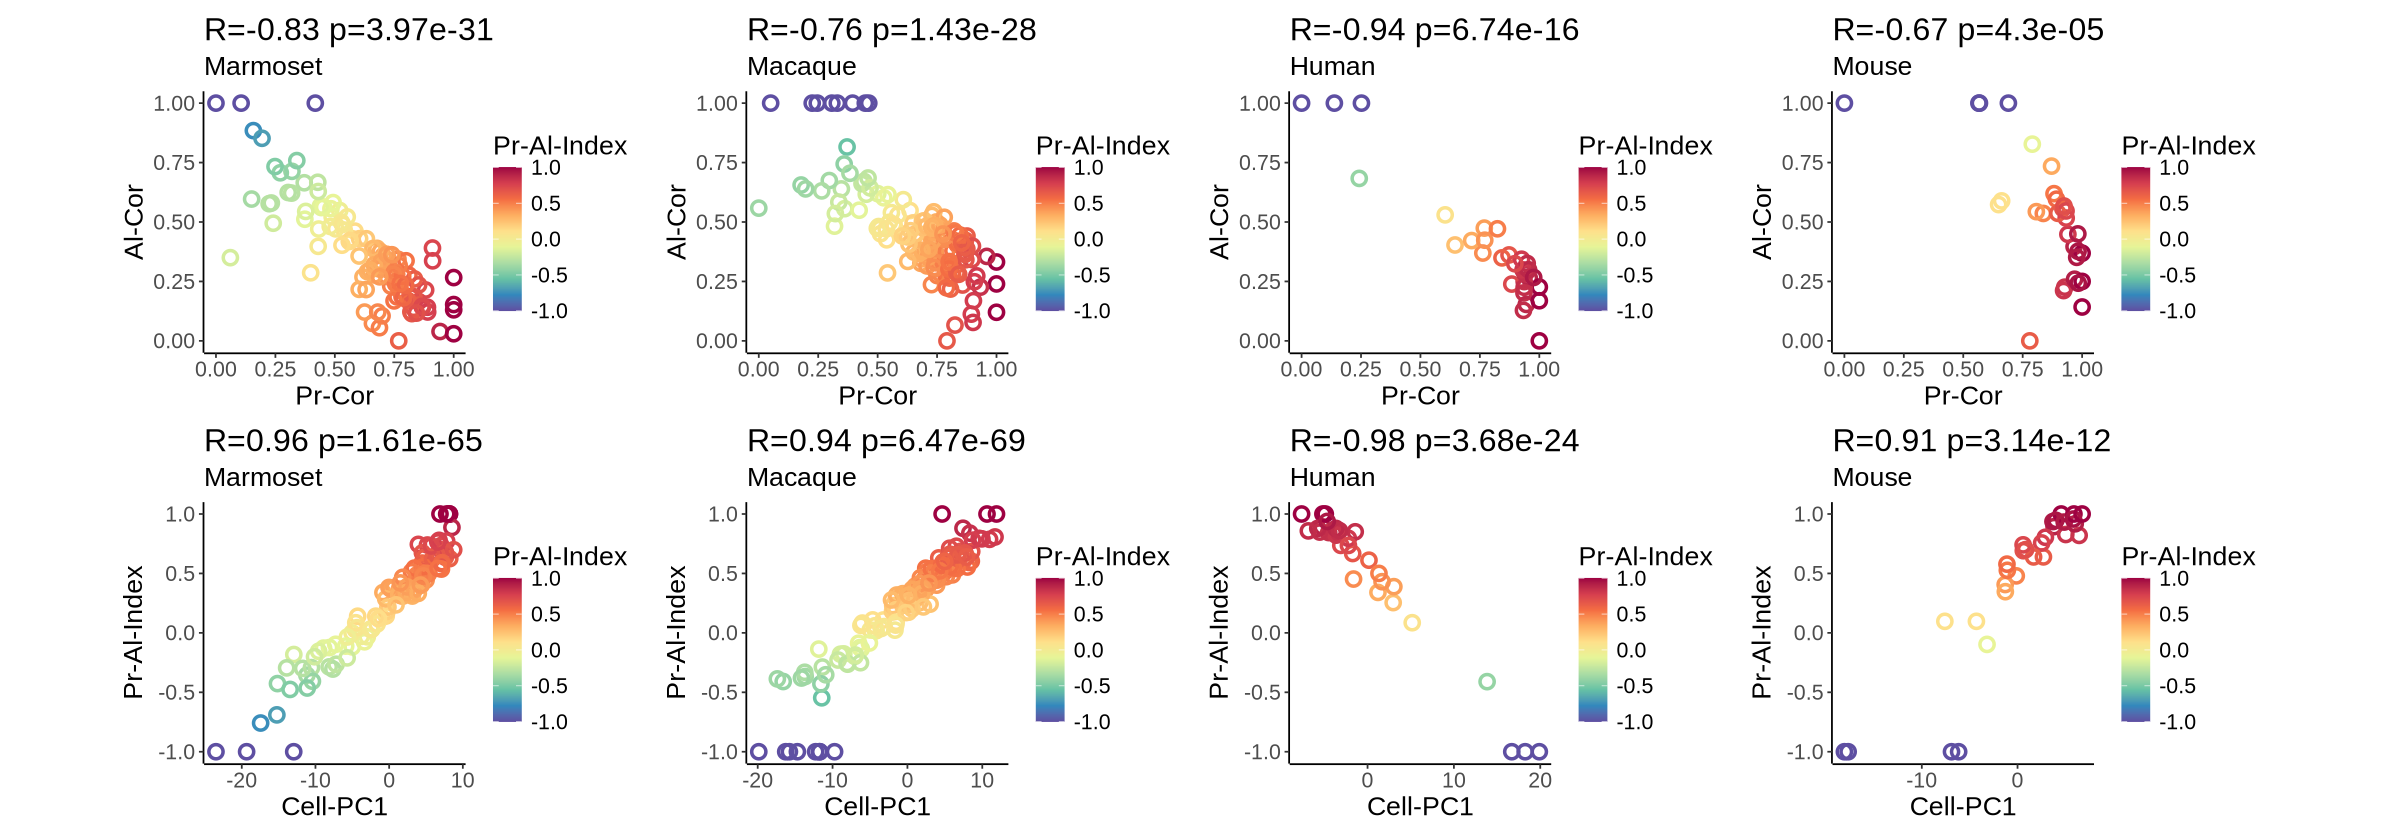

In [182]:
options(repr.plot.width=20,repr.plot.height=7)
#Plot correlation between different species' region-level Pr-Al Index and their Cell PC1
source('R_function/Pr_Al.R')
plot_cor_dot(obj_mar,X='Pr-Cor',Y='Al-Cor',var='Pr-Al-Index')+labs(subtitle = "Marmoset")+
plot_cor_dot(obj_mac,X='Pr-Cor',Y='Al-Cor',var='Pr-Al-Index')+labs(subtitle = "Macaque")+
plot_cor_dot(obj_hum,X='Pr-Cor',Y='Al-Cor',var='Pr-Al-Index')+labs(subtitle = "Human")+
plot_cor_dot(obj_mou,X='Pr-Cor',Y='Al-Cor',var='Pr-Al-Index')+labs(subtitle = "Mouse")+
plot_cor_dot(obj_mar,X='Cell-PC1',Y='Pr-Al-Index',var='Pr-Al-Index')+labs(subtitle = "Marmoset")+
plot_cor_dot(obj_mac,X='Cell-PC1',Y='Pr-Al-Index',var='Pr-Al-Index')+labs(subtitle = "Macaque")+
plot_cor_dot(obj_hum,X='Cell-PC1',Y='Pr-Al-Index',var='Pr-Al-Index')+labs(subtitle = "Human")+
plot_cor_dot(obj_mou,X='Cell-PC1',Y='Pr-Al-Index',var='Pr-Al-Index')+labs(subtitle = "Mouse")+
plot_layout(ncol=4)

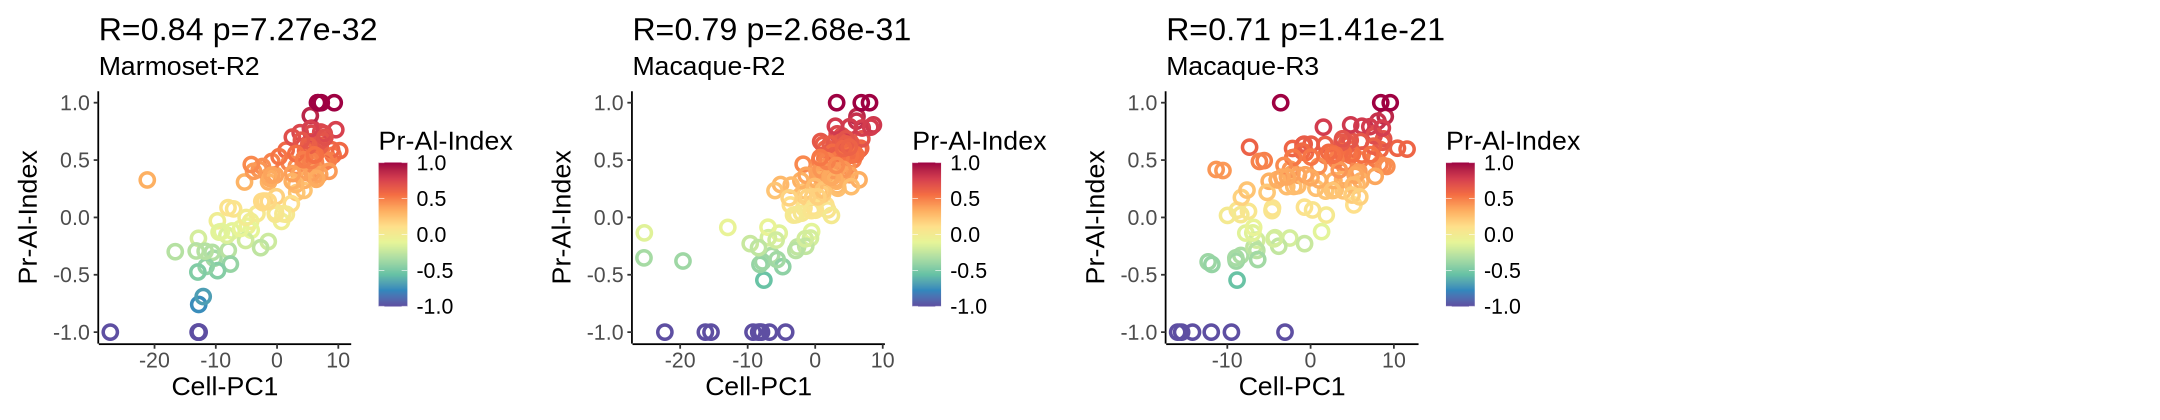

In [183]:
options(repr.plot.width=18,repr.plot.height=3.5)
#Plot correlation between replicate region-level Cell PC1 and Pr-Al Index
plot_cor_dot(obj_mar2,X='Cell-PC1',Y='Pr-Al-Index',var='Pr-Al-Index')+labs(subtitle = "Marmoset-R2")+
plot_cor_dot(obj_mac2,X='Cell-PC1',Y='Pr-Al-Index',var='Pr-Al-Index')+labs(subtitle = "Macaque-R2")+
plot_cor_dot(obj_mac3,X='Cell-PC1',Y='Pr-Al-Index',var='Pr-Al-Index')+labs(subtitle = "Macaque-R3")+
plot_layout(ncol=4)

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


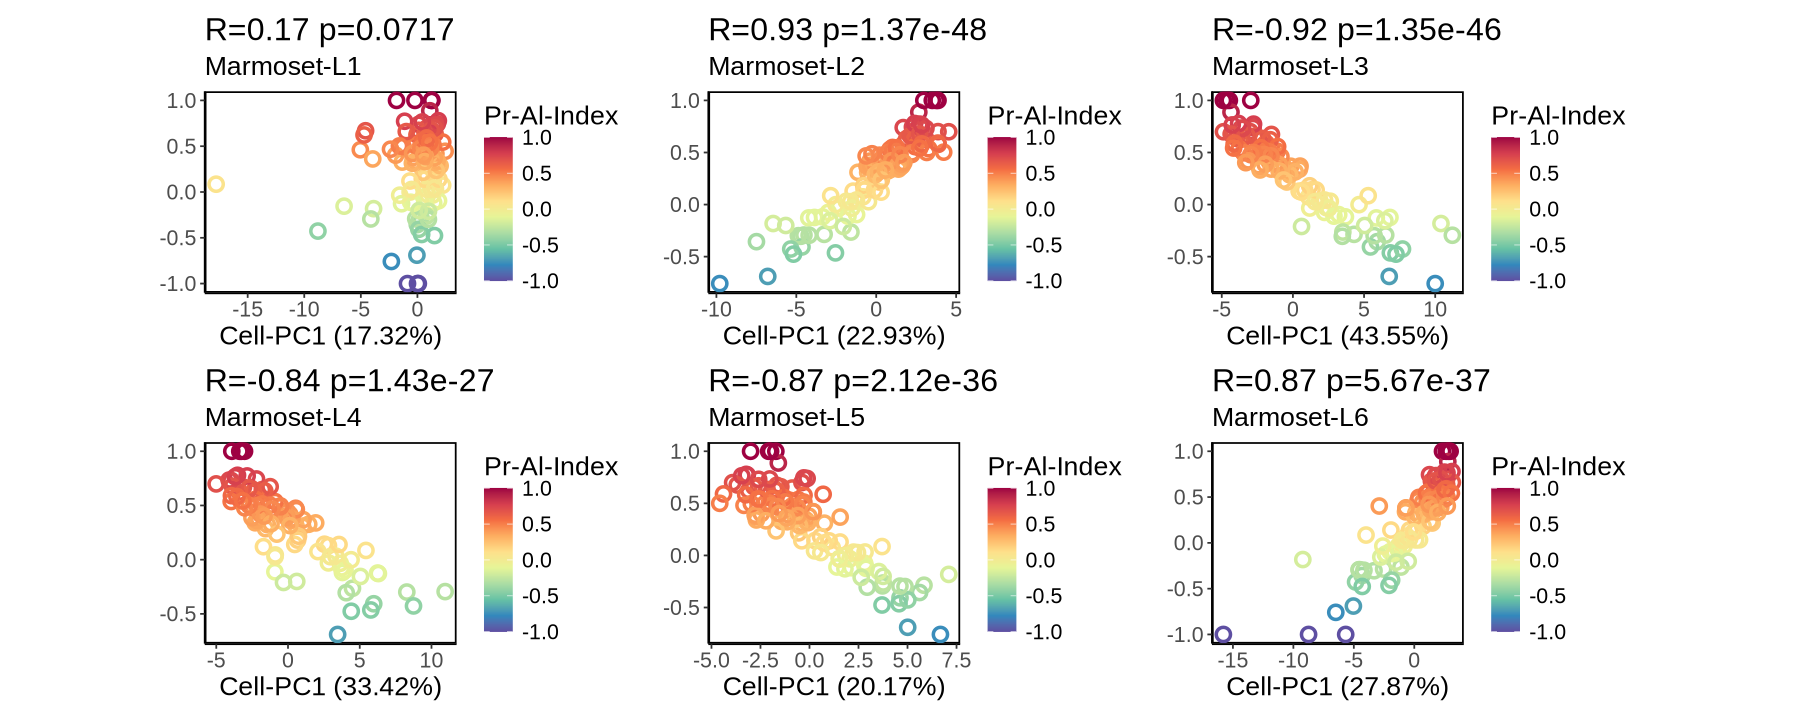

In [178]:
options(repr.plot.width=15,repr.plot.height=6)
source('R_function/Pr_Al.R')
plot_layer_add_border <- function(obj){
    return(plot_cor_dot(obj,X='Cell-PC1',Y='Pr-Al-Index',var='Pr-Al-Index')+
           scale_color_gradientn(colours = rev(RColorBrewer::brewer.pal(11,"Spectral")[-6]),limits=c(-1,1),name='Pr-Al-Index')+
           theme(text=element_text(size=16),panel.grid = element_blank(),panel.background = element_rect(colour = 'black',fill=NA,linewidth = 1),
           axis.title.y=element_blank())+theme(aspect.ratio=0.8)+
           xlab(paste0('Cell-PC1 (',round(100*obj@reductions$pca@stdev[1]**2/obj@reductions$pca@misc$total.variance,2),'%)')))}
#Plot correlation between marmoset's layers region-level Cell PC1 and Pr-Al Index
plot_layer_add_border(obj_mar_L1)+labs(subtitle = "Marmoset-L1")+
plot_layer_add_border(obj_mar_L2)+labs(subtitle = "Marmoset-L2")+
plot_layer_add_border(obj_mar_L3)+labs(subtitle = "Marmoset-L3")+
plot_layer_add_border(obj_mar_L4)+labs(subtitle = "Marmoset-L4")+
plot_layer_add_border(obj_mar_L5)+labs(subtitle = "Marmoset-L5")+
plot_layer_add_border(obj_mar_L6)+labs(subtitle = "Marmoset-L6")+
plot_layout(ncol=3)

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


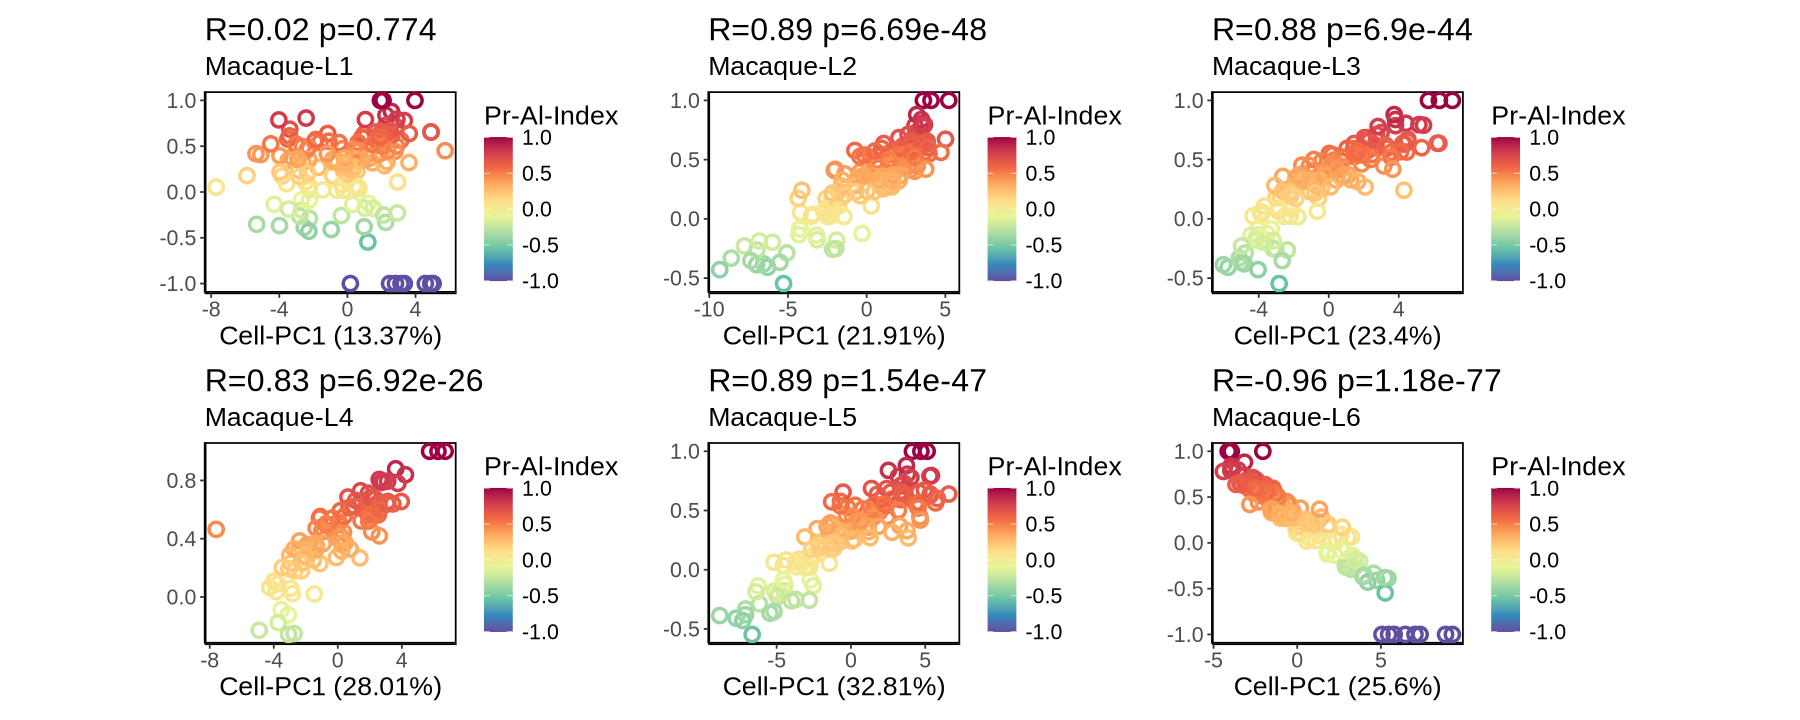

In [179]:
#Plot correlation between macaque's layers region-level Cell PC1 and Pr-Al Index
plot_layer_add_border(obj_mac_L1)+labs(subtitle = "Macaque-L1")+
plot_layer_add_border(obj_mac_L2)+labs(subtitle = "Macaque-L2")+
plot_layer_add_border(obj_mac_L3)+labs(subtitle = "Macaque-L3")+
plot_layer_add_border(obj_mac_L4)+labs(subtitle = "Macaque-L4")+
plot_layer_add_border(obj_mac_L5)+labs(subtitle = "Macaque-L5")+
plot_layer_add_border(obj_mac_L6)+labs(subtitle = "Macaque-L6")+
plot_layout(ncol=3)

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


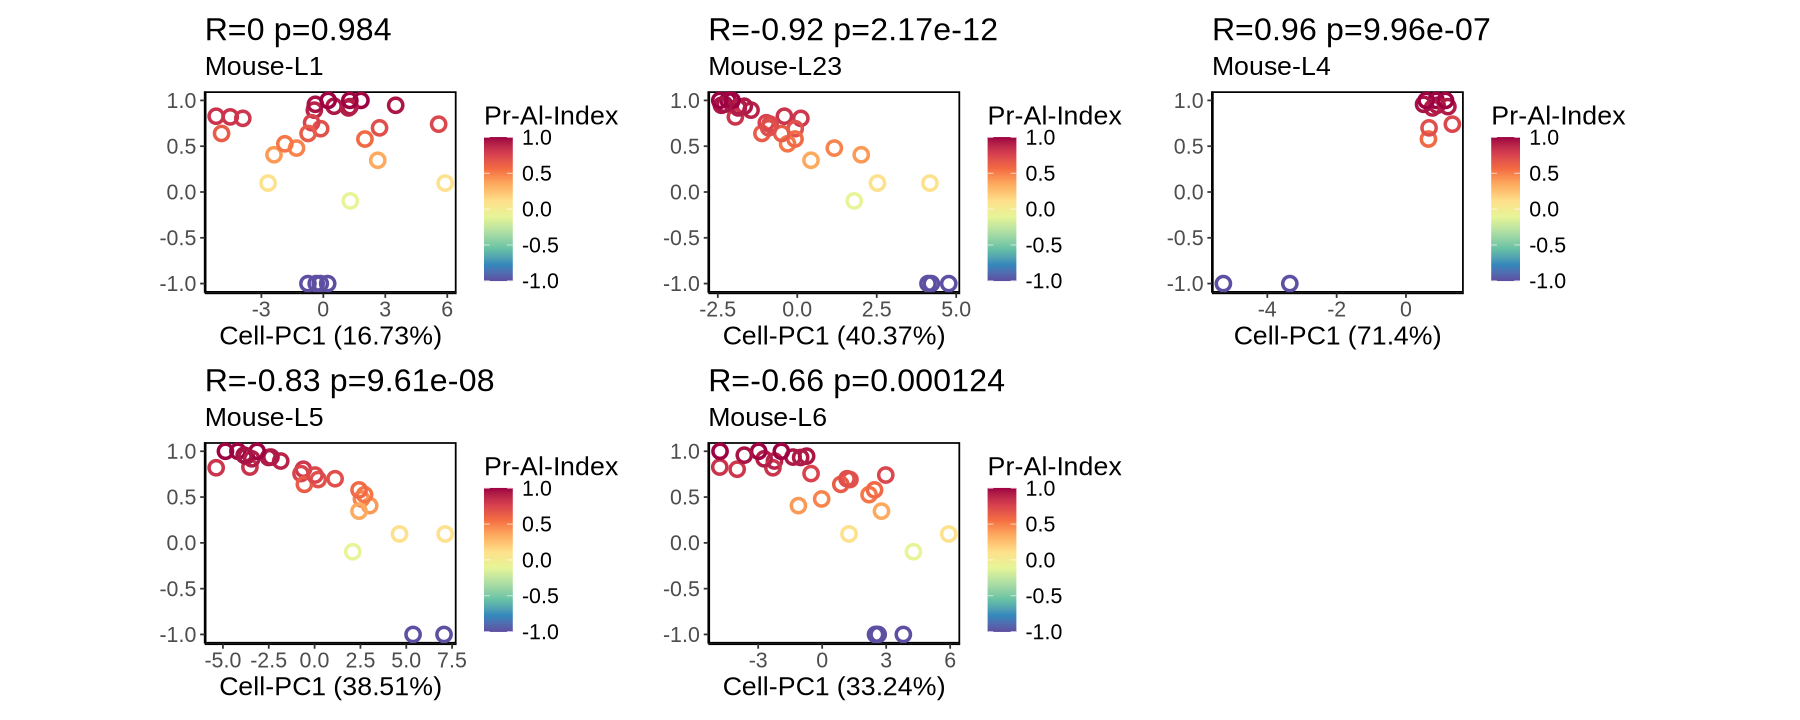

In [180]:
#Plot correlation between mouse's layers region-level Cell PC1 and Pr-Al Index
plot_layer_add_border(obj_mou_L1)+labs(subtitle = "Mouse-L1")+
plot_layer_add_border(obj_mou_L23)+labs(subtitle = "Mouse-L23")+
plot_layer_add_border(obj_mou_L4)+labs(subtitle = "Mouse-L4")+
plot_layer_add_border(obj_mou_L5)+labs(subtitle = "Mouse-L5")+
plot_layer_add_border(obj_mou_L6)+labs(subtitle = "Mouse-L6")+
plot_layout(ncol=3)

Warning message:
“Use of `flat_mou$region` is discouraged.
ℹ Use `region` instead.”
Warning message:
“Use of `flat_mar$region` is discouraged.
ℹ Use `region` instead.”


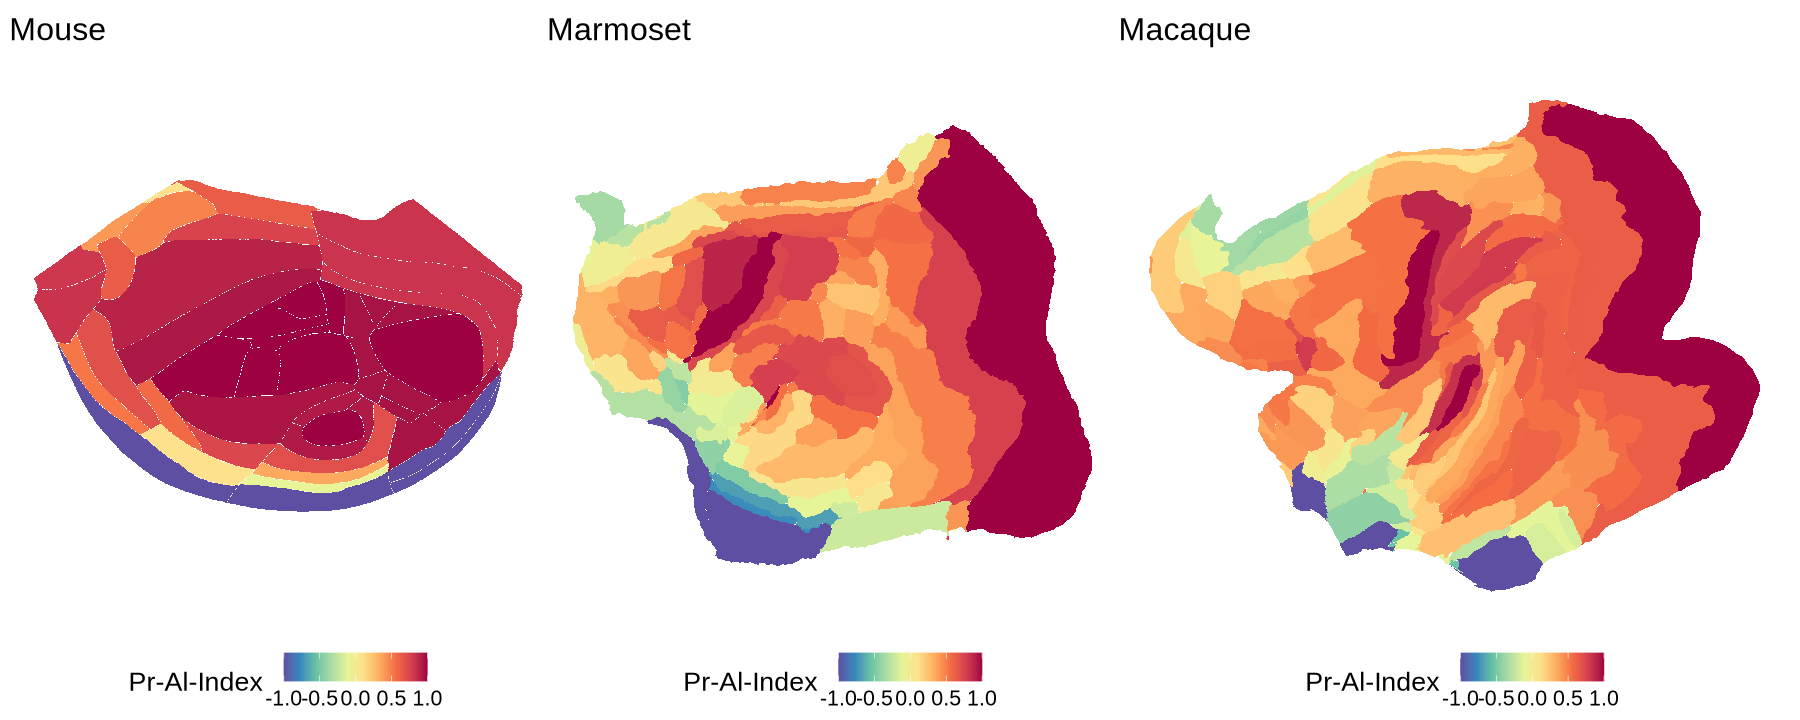

In [219]:
options(repr.plot.width=15,repr.plot.height=6)
#Plot the region-level Pr-Al Index on an MRI flatmap.
#Utilize the shapefiles (shp files) through the functions provided in the flatmap_plot.R script.
#input a dataframe which must include region column
source('R_function/flatmap_plot.R')
plot_mou_flatmap_col(obj_mou@meta.data,'Pr-Al-Index')+ggtitle('Mouse')+
plot_mar_flatmap_col(obj_mar@meta.data,'Pr-Al-Index')+ggtitle('Marmoset')+
plot_mac_flatmap_col(obj_mac@meta.data,'Pr-Al-Index')+ggtitle('Macaque')+
plot_layout(ncol=3,widths = c(0.8,0.85,1))

<font size=10>---------------Region-level gene analysis-------------<font size=10>

In [296]:
#Homologous gene table from TableS2E
species_gene <- read.csv('Tabledata/mart_export.humanMacaqeMarmosetMouse.oneToOneOrth.ensembl91.20220428.txt',sep='\t')
source('R_function/Unify_gene.R')

In [294]:
#Locate the gene within the homolog list
obj_mar_gene <- Find_homogene(obj_mar_gene,'marmoset')
obj_mac_gene <- Find_homogene(obj_mac_gene,'macaque')
obj_mou_gene <- Find_homogene(obj_mou_gene,'mouse')
obj_hum_gene <- Find_homogene(obj_hum_gene,'human')

#Locate the gene within the homolog list and its expression across all species.
all_exp_genes <- inter_multi(list(unique(obj_mar_gene[['RNA']]@meta.features$homoname),unique(obj_mac_gene[['RNA']]@meta.features$homoname),
                                  unique(obj_mou_gene[['RNA']]@meta.features$homoname),unique(obj_hum_gene[['RNA']]@meta.features$homoname)))
all_exp_genes <- all_exp_genes[all_exp_genes!='None']

obj_mar_gene[['RNA']]@meta.features$homo_exp <- obj_mar_gene[['RNA']]@meta.features$homoname%in%all_exp_genes
obj_mac_gene[['RNA']]@meta.features$homo_exp <- obj_mac_gene[['RNA']]@meta.features$homoname%in%all_exp_genes
obj_mou_gene[['RNA']]@meta.features$homo_exp <- obj_mou_gene[['RNA']]@meta.features$homoname%in%all_exp_genes
obj_hum_gene[['RNA']]@meta.features$homo_exp <- obj_hum_gene[['RNA']]@meta.features$homoname%in%all_exp_genes

In [298]:
source('R_function/Pr_Al.R')

In [301]:
#Normalize All data and calculate PCA within their homo-expression gene 
obj_mar_gene <- prepare_obj_gene(obj_mar_gene)
obj_mac_gene <- prepare_obj_gene(obj_mac_gene)
obj_mou_gene <- prepare_obj_gene(obj_mou_gene)
obj_hum_gene <- prepare_obj_gene(obj_hum_gene)

In [307]:
source('R_function/flatmap_plot.R')

In [321]:
#Correlation between Gene-PC1 and Pr-Al Index
cor(obj_mar_gene@meta.data[obj_mar$region,'Gene-PC1'],obj_mar$`Pr-Al-Index`)
cor(obj_mac_gene@meta.data[obj_mac$region,'Gene-PC1'],obj_mac$`Pr-Al-Index`)
cor(obj_mou_gene@meta.data[obj_mou$region,'Gene-PC1'],obj_mou$`Pr-Al-Index`)
cor(obj_hum_gene@meta.data[obj_hum$region,'Gene-PC1'],obj_hum$`Pr-Al-Index`)

[1] -0.8030502

[1] 0.7213032

[1] -0.7380828

[1] NA

Warning message:
“Use of `flat_mou$region` is discouraged.
ℹ Use `region` instead.”
Warning message:
“Use of `flat_mar$region` is discouraged.
ℹ Use `region` instead.”
Warning message:
“Use of `flat_hum$region` is discouraged.
ℹ Use `region` instead.”


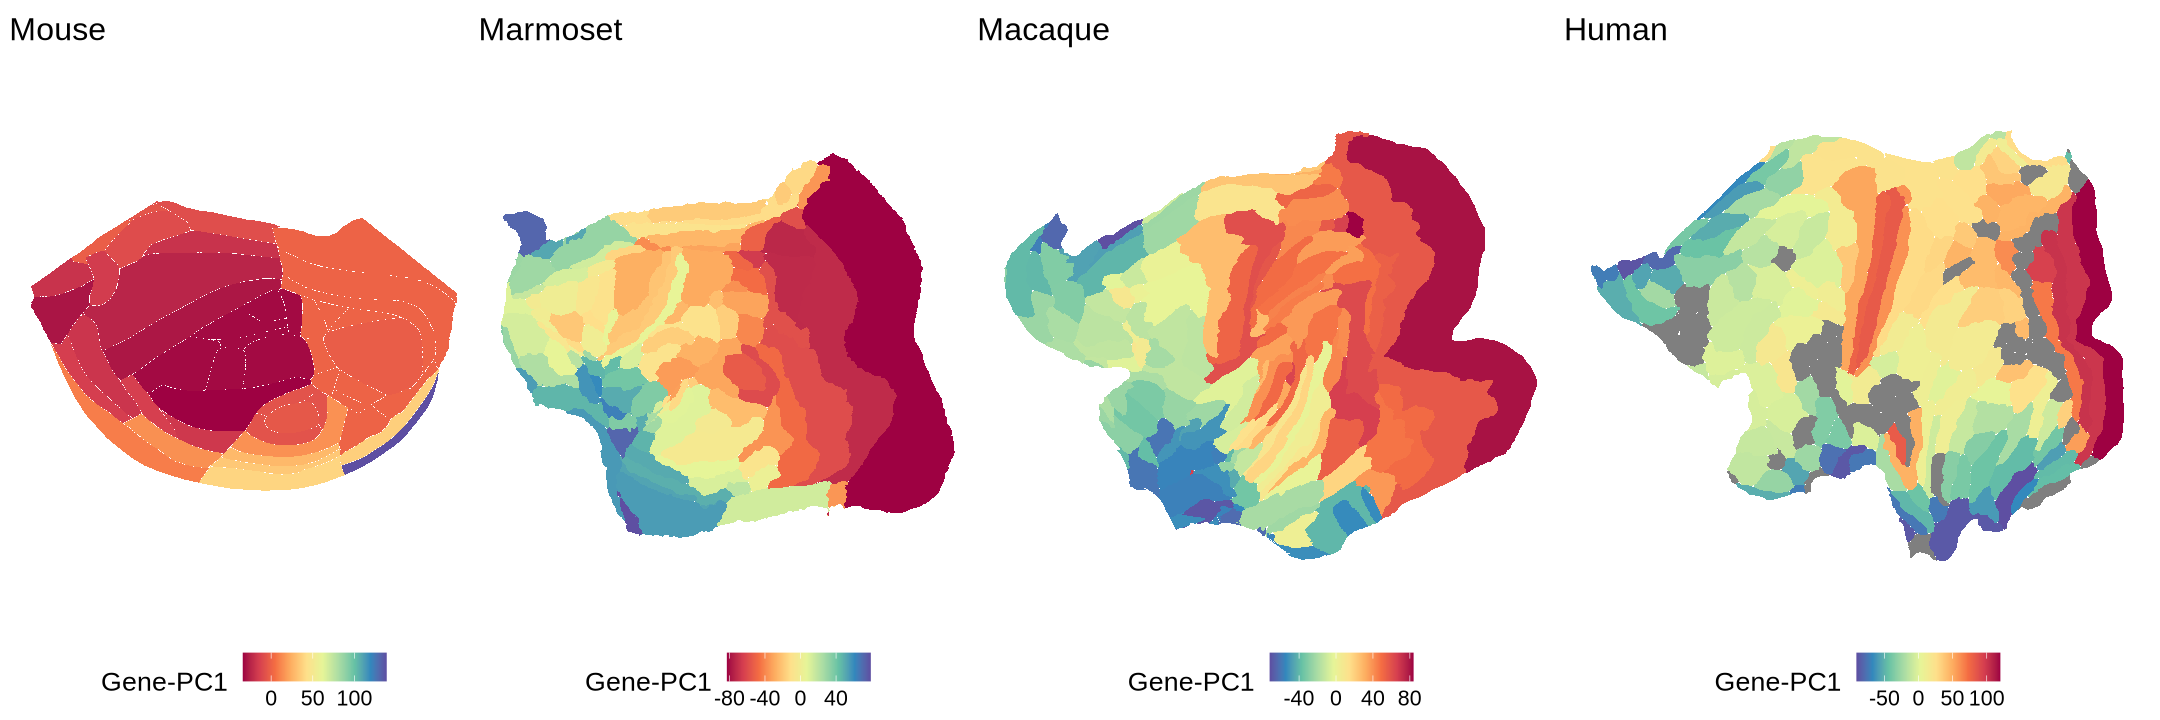

In [310]:
options(repr.plot.width=18,repr.plot.height=6)
#Plot the region-level Gene-PC1 on an MRI flatmap.
plot_mou_flatmap_col(obj_mou_gene@meta.data,'Gene-PC1',color = RColorBrewer::brewer.pal(11,'Spectral')[-6])+ggtitle('Mouse')+
plot_mar_flatmap_col(obj_mar_gene@meta.data,'Gene-PC1',color = RColorBrewer::brewer.pal(11,'Spectral')[-6])+ggtitle('Marmoset')+
plot_mac_flatmap_col(obj_mac_gene@meta.data,'Gene-PC1')+ggtitle('Macaque')+
plot_hum_flatmap_col(obj_hum_gene@meta.data,'Gene-PC1')+ggtitle('Human')+
plot_layout(ncol=4,widths = c(0.8,0.85,1,1))